# Ruchy Browna
## Autorzy:
- Paweł Wysocki
- Piotr Jabłoński

## Wprowadzenie:

Ruchy Browna to chaotyczne ruchy cząsteczek zawieszonych w cieczy lub gazie. Wynikają one z bombardowania cząsteczki przez o wiele mniejsze cząsteczki ośrodka, które są znacznie mniejsze i poruszają się bardzo szybko.

Zjawisko to występuje w płynach, w których zachodzi równowaga termiczna. Molekuły poruszają się w nich zgodnie z ruchami Browna, jednak nie istnieje żaden preferencyjny kierunek przepływu, tj. całkowity pęd płynu pozostaje zerowy w czasie. Im większa temperatura, tym większą energię kinetyczną mają cząsteczki, przez co wzrasta intensywność ruchów Browna.

Kierunek siły bombardowania atomowego stale się zmienia, w różnych momentach cząstka jest uderzana częściej z jednej strony, skąd wynika pozornie losowa natura ruchu. To wyjaśnienie ruchów Browna było uznane za przekonujący dowód na istnienie atomów oraz cząsteczek i zostało dodatkowo zweryfikowane eksperymentalne.

## Matematyczny opis zjawiska:

Matematycznym modelem ruchów Browna jest tzw. proces Wienera. Jest to proces stochastyczny (funkcja zależna od czasu, której wartości w każdym momencie czasu są zmiennymi losowymi), szeroko wykorzystywany w opisywaniu zjawisk występujących w ekonomii, finansach i fizyce. Ponadto, jest on najbardziej znanym przykładem procesu gaussowskiego (proces stochastyczny, którego rozkłady skończenie wymiarowe są gaussowskie), a także szczególnym przypadkiem procesu Levy'ego.

Proces stochastyczny na przestrzeni probabilistycznej jest (standardowym) procesem Wienera, jeśli spełnia następujące warunki:
1. $W_0 = 0$ prawie na pewno (z prawdopodobieństwem zdarzenia 1) 
2. Proces ma przyrosty niezależne, (dla wszelkich $0 \le t_1 \lt t_2 \lt \dots \lt t_k$ zmienne losowe $W_{t_1}, W_{t_2} - W_{t_1}, \dots, W_{t_k} - W_{t_{k-1}}$ są niezależne)
3. $W_t - W_s$ ~ $N(0, t-s)$ dla wszelkich $0 \le s \le t$ (różnica procesu Wienera w dwóch dowolnych chwilach ma rozkład normalny o średniej równej zeru wariancji równej odległości czasowej rozważanych chwil)
4. $W_t$ jest prawie na pewno ciągły w $t$


# Implementacja

W naszym programie, zamiast wyznaczać nowe położenie, wyznaczamy kolejne kroki po czasie $\Delta t$.

Poniżej znajduje się kod służący do generowania wykresów ruchu.

In [1]:
from brownian import BrownianMotion
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from typing import Callable, Tuple

DT = 0.001
N = 1000
STARTING_POINT = 0

def generate_walk(starting_point: float, step_func: Callable, mu: float = 0, sigma: float = 1.0, dt: float = DT, num_steps: int = N) -> list[float]:
    steps = [starting_point]
    current = starting_point
    for _ in range(num_steps):
        current += step_func(dt, mu, sigma)
        steps.append(current)
    return steps

def generate_2D(starting_point: float, step_func: Callable, mu: float = 0, sigma: float = 1.0, dt: float = DT, num_steps: int = N) -> Tuple[list[float],list[float]]:
    x_steps = generate_walk(starting_point, step_func, mu, sigma, dt, num_steps)
    y_steps = generate_walk(starting_point, step_func, mu, sigma, dt, num_steps)
    return (x_steps, y_steps)


# BORROWED FROM A MATPLOTLIB DOCUMENTATION EXAMPLE
def colored_line(x, y, c, ax, **lc_kwargs):
    """
    Plot a line with a color specified along the line by a third value.

    It does this by creating a collection of line segments. Each line segment is
    made up of two straight lines each connecting the current (x, y) point to the
    midpoints of the lines connecting the current point with its two neighbors.
    This creates a smooth line with no gaps between the line segments.

    Parameters
    ----------
    x, y : array-like
        The horizontal and vertical coordinates of the data points.
    c : array-like
        The color values, which should be the same size as x and y.
    ax : Axes
        Axis object on which to plot the colored line.
    **lc_kwargs
        Any additional arguments to pass to matplotlib.collections.LineCollection
        constructor. This should not include the array keyword argument because
        that is set to the color argument. If provided, it will be overridden.

    Returns
    -------
    matplotlib.collections.LineCollection
        The generated line collection representing the colored line.
    """

    # Default the capstyle to butt so that the line segments smoothly line up
    default_kwargs = {"capstyle": "butt"}
    default_kwargs.update(lc_kwargs)

    # Compute the midpoints of the line segments. Include the first and last points
    # twice so we don't need any special syntax later to handle them.
    x = np.asarray(x)
    y = np.asarray(y)
    x_midpts = np.hstack((x[0], 0.5 * (x[1:] + x[:-1]), x[-1]))
    y_midpts = np.hstack((y[0], 0.5 * (y[1:] + y[:-1]), y[-1]))

    # Determine the start, middle, and end coordinate pair of each line segment.
    # Use the reshape to add an extra dimension so each pair of points is in its
    # own list. Then concatenate them to create:
    # [
    #   [(x1_start, y1_start), (x1_mid, y1_mid), (x1_end, y1_end)],
    #   [(x2_start, y2_start), (x2_mid, y2_mid), (x2_end, y2_end)],
    #   ...
    # ]
    coord_start = np.column_stack((x_midpts[:-1], y_midpts[:-1]))[:, np.newaxis, :]
    coord_mid = np.column_stack((x, y))[:, np.newaxis, :]
    coord_end = np.column_stack((x_midpts[1:], y_midpts[1:]))[:, np.newaxis, :]
    segments = np.concatenate((coord_start, coord_mid, coord_end), axis=1)

    lc = LineCollection(segments, **default_kwargs) # type: ignore
    lc.set_array(c)  # set the colors of each segment

    return ax.add_collection(lc)

def showcase1D(motion: Callable, motion_name: str, mu: float = 0, sigma: float = 1, runs: int = 50) -> None:
    timestamps = np.arange(0, N*DT+DT, DT)
    plt.figure(figsize=(16,10))
    for _ in range(runs):
        steps = generate_walk(STARTING_POINT, motion, mu, sigma)
        plt.plot(timestamps, steps)
    plt.suptitle(f"Showcase of a {motion_name} version of Brownian Motion",fontsize=20)
    plt.title(f"Starting value: {STARTING_POINT}. $\mu$ = {mu}, $\sigma$ = {sigma}.")
    plt.xlabel("Time [s]")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

def showcase2D(motion: Callable, motion_name: str, mu: float = 0, sigma: float = 1) -> None:
    x,y = generate_2D(STARTING_POINT, motion, mu, sigma)
    timestamps = np.arange(0, N*DT+DT, DT)
    fig, ax = plt.subplots()
    lines = colored_line(x,y,timestamps,ax,linewidth=1,cmap="viridis")
    cbar = fig.colorbar(lines)
    cbar.set_label("Time [s]")
    fig.suptitle(f"Showcase of a {motion_name} version of Brownian Motion in 2D",fontsize=20)
    ax.set_title(f"Starting value: ({STARTING_POINT},{STARTING_POINT}). $\mu$ = {mu}, $\sigma$ = {sigma}.")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(min(x), max(x))
    ax.set_ylim(min(y), max(y))
    ax.grid(True)
    plt.show()

def showcase_different_sigmas(motion: Callable, motion_name: str, mu: float = 0, sigmas: list[float] = [1]):
    timestamps = np.arange(0, N*DT+DT, DT)
    plt.figure(figsize=(16,10))
    for sigma in sigmas:
        steps = generate_walk(STARTING_POINT, motion, mu, sigma)
        line = plt.plot(timestamps, steps)[0]
        line.set_label(f"$\sigma$ = {sigma}")
    plt.suptitle(f"Showcase of the impact of $\sigma$ on the {motion_name} version of Brownian Motion",fontsize=20)
    plt.title(f"Starting value: {STARTING_POINT}. $\mu$ = {mu}.")
    plt.xlabel("Time [s]")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

<>:90: SyntaxWarning: invalid escape sequence '\m'
<>:90: SyntaxWarning: invalid escape sequence '\s'
<>:104: SyntaxWarning: invalid escape sequence '\m'
<>:104: SyntaxWarning: invalid escape sequence '\s'
<>:118: SyntaxWarning: invalid escape sequence '\s'
<>:119: SyntaxWarning: invalid escape sequence '\s'
<>:120: SyntaxWarning: invalid escape sequence '\m'
<>:90: SyntaxWarning: invalid escape sequence '\m'
<>:90: SyntaxWarning: invalid escape sequence '\s'
<>:104: SyntaxWarning: invalid escape sequence '\m'
<>:104: SyntaxWarning: invalid escape sequence '\s'
<>:118: SyntaxWarning: invalid escape sequence '\s'
<>:119: SyntaxWarning: invalid escape sequence '\s'
<>:120: SyntaxWarning: invalid escape sequence '\m'
C:\Users\duszk\AppData\Local\Temp\ipykernel_20784\3886968666.py:90: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"Starting value: {STARTING_POINT}. $\mu$ = {mu}, $\sigma$ = {sigma}.")
C:\Users\duszk\AppData\Local\Temp\ipykernel_20784\3886968666.py:90: SyntaxWarnin

pygame 2.6.1 (SDL 2.28.4, Python 3.13.0)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame-menu 4.4.8


### Standardowy ruch:

Standardową postać można wyrazić następującym wzorem:

$x(t+1) = x(t) + \sqrt{\Delta t} \cdot N(0,1) \Rightarrow \Delta x = \sqrt{\Delta t} \cdot N(0,1)$, 

gdzie $N(0,1)$ - liczba wylosowana zgodnie z rozkładem Gaussa.

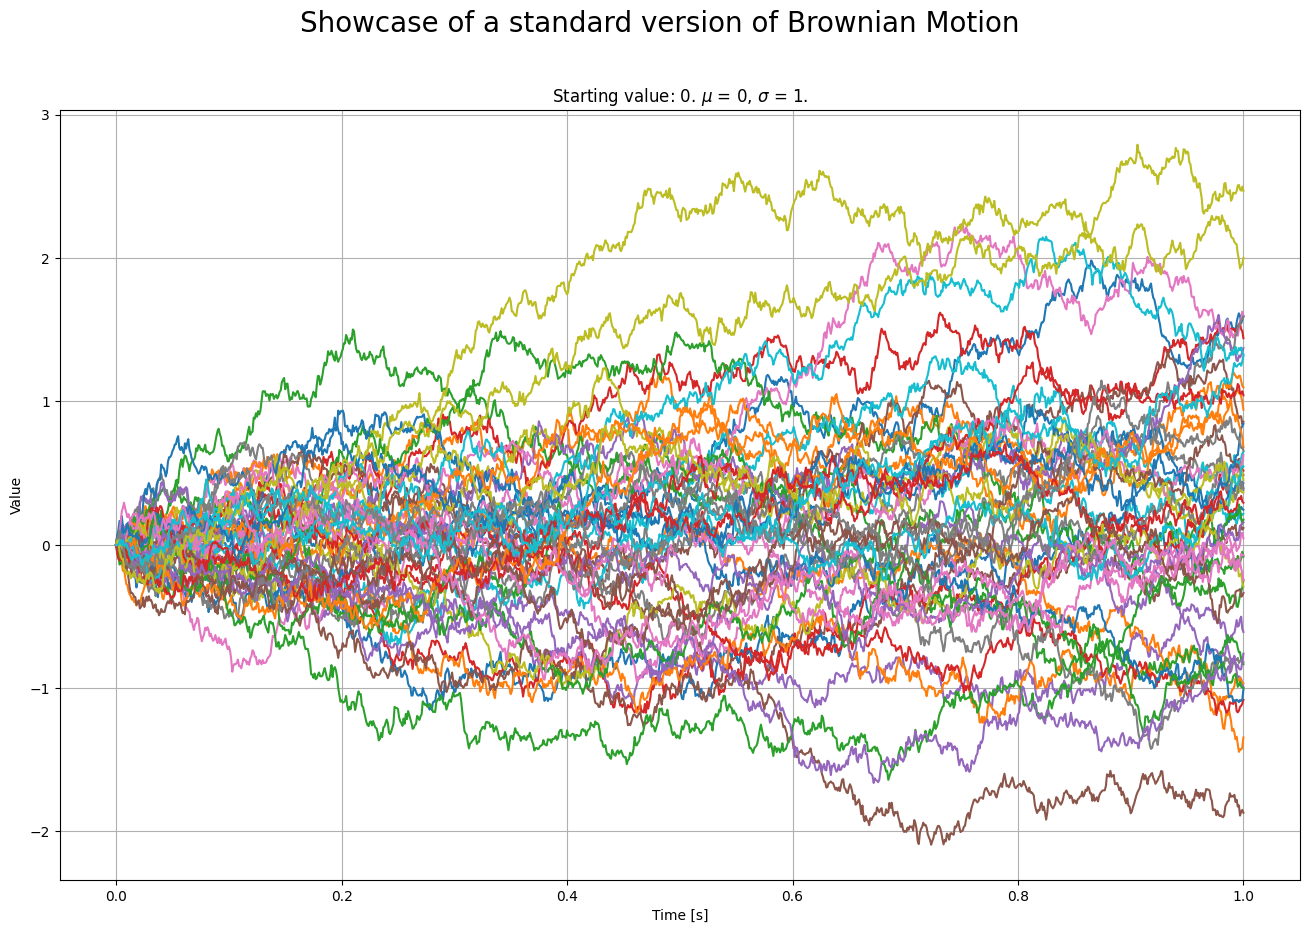

In [2]:
showcase1D(BrownianMotion.standard, "standard")

Jak widać, większość wartości znajduje się w przedziale $[-1;1]$ dla $t = 1$, z nielicznymi przypadkami odstającymi. W ogólności, wszystkie ścieżki skupiają się wokół wartości początkowej. Jest to oczekiwane zachowanie dla ruchów Browna w wersji standardowej. 

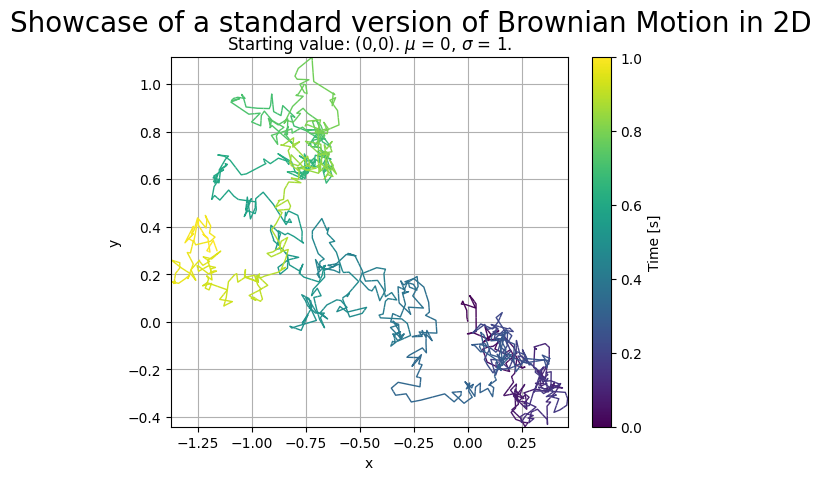

In [3]:
showcase2D(BrownianMotion.standard, "standard")

Jak widać, nie ma preferencyjnego kierunku ruchu, tor ruchu jest losowy. Potwierdza to chaotyczność ruchów Browna.

### Ruch z dryfem i czułością

Standardowy ruch Browna można delikatnie zmodyfikować wprowadzając dodatkowe zmienne:

$x(t+1) = x(t) + \mu \Delta t + \sigma \sqrt{\Delta t} \cdot N(0,1) \Rightarrow \Delta x = \mu \Delta t + \sigma \sqrt{\Delta t} \cdot N(0,1)$,

gdzie:
- $N(0,1)$ - liczba wylosowana zgodnie z rozkładem Gaussa
- $\mu$ - parametr "dryfu", pozwalający na zmianę wartości średniej losowanych przemieszczeń
- $\sigma$ - parametr "czułości", pozwalający na modulację odchylenia standardowego, a więc także siły zmian

W praktyce oznacza to, że $\mu$ wprowadza tendencyjność do ruchu, a $\sigma$ zwiększa fluktuację generowanych wartości.

#### Wpływ parametru $\mu$

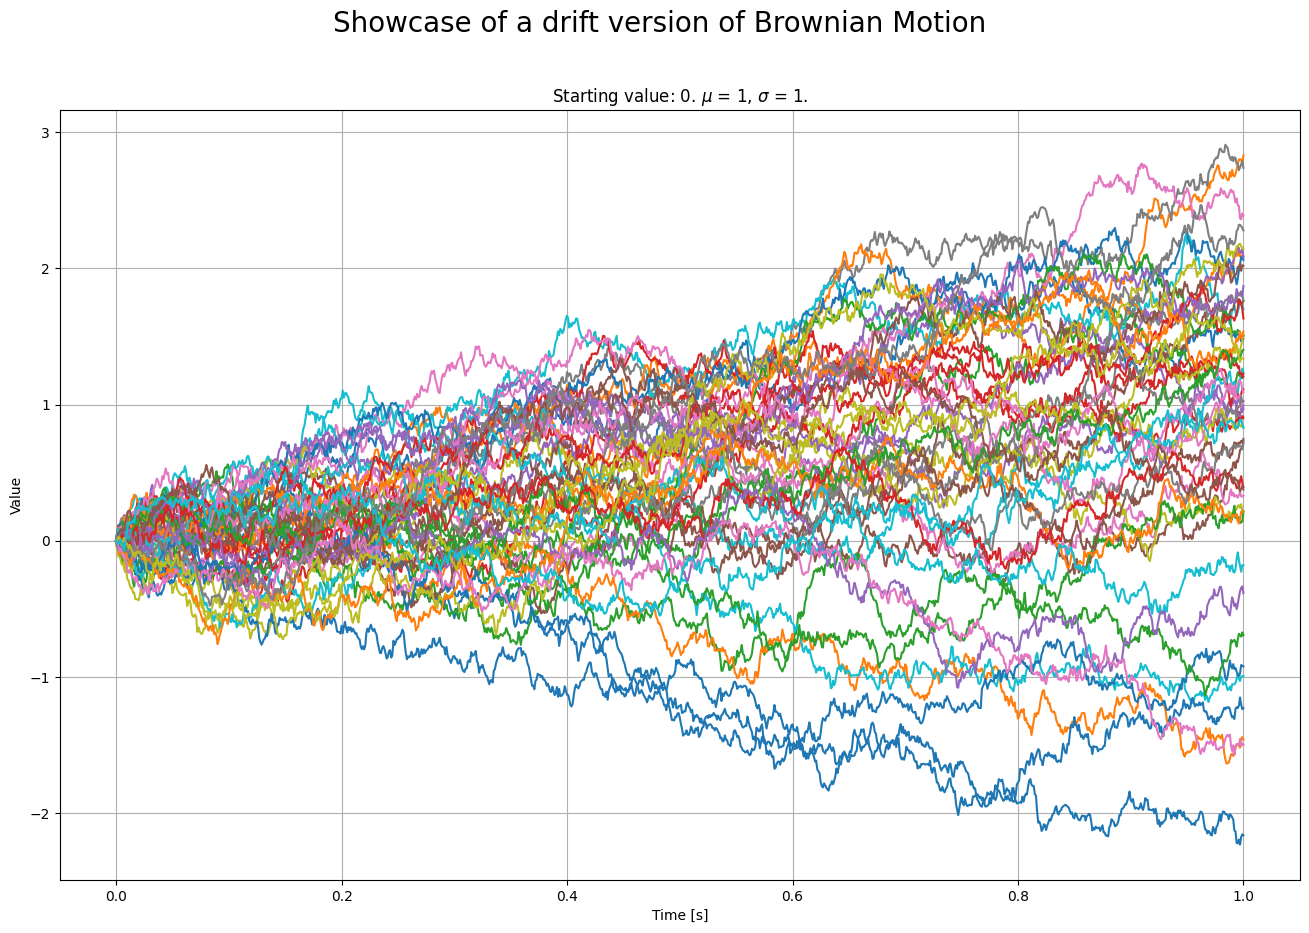

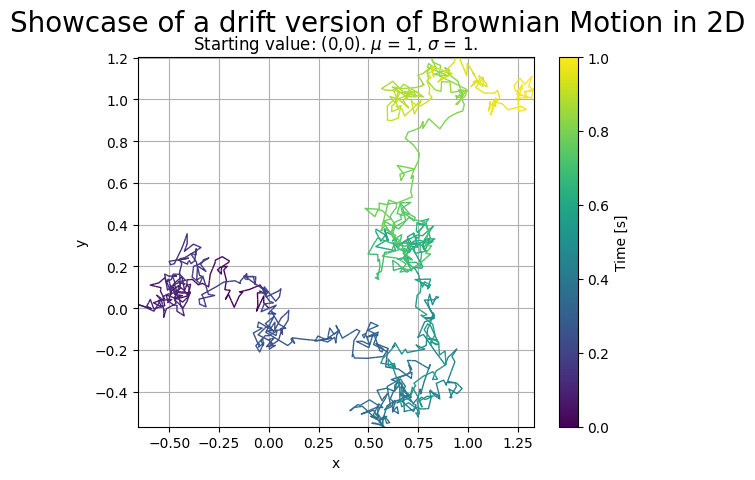

In [4]:
showcase1D(BrownianMotion.drift, "drift", mu=1, sigma=1)
showcase2D(BrownianMotion.drift, "drift", mu=1, sigma=1)

Dla dodatnich wartości $\mu$ w ogólności kolejne generowane wartości mają tendencję wzrostową. Odzwierciedla się to na pierwszym wykresie, gdzie zdecydowana większość wartości znajduje się w przedziale $[0;2]$. Jest to też dobrze widoczne na wykresie drugim, gdzie zmiana położenia w czasie w ogólności rośnie dla obu współrzędnych.

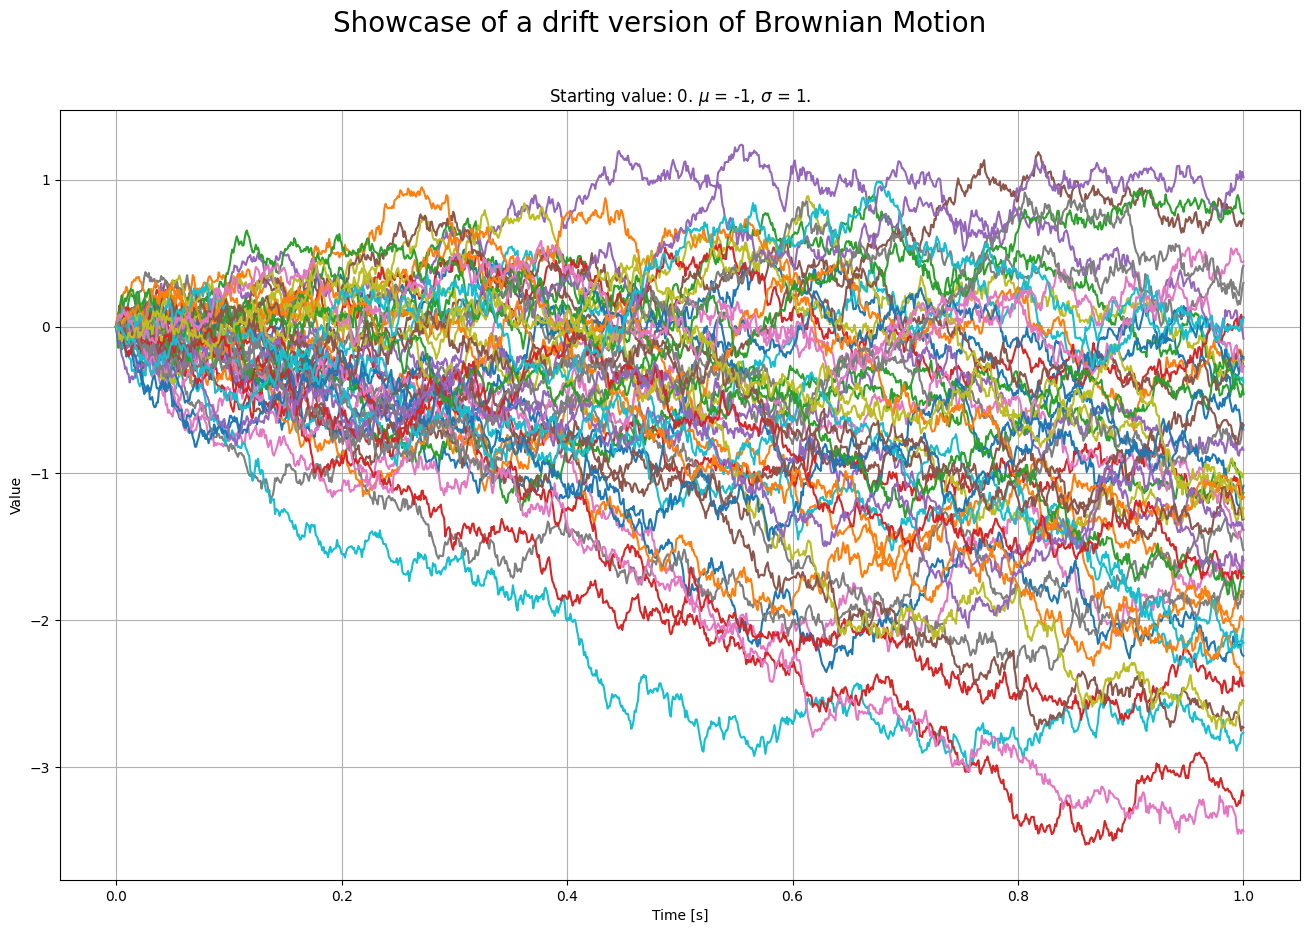

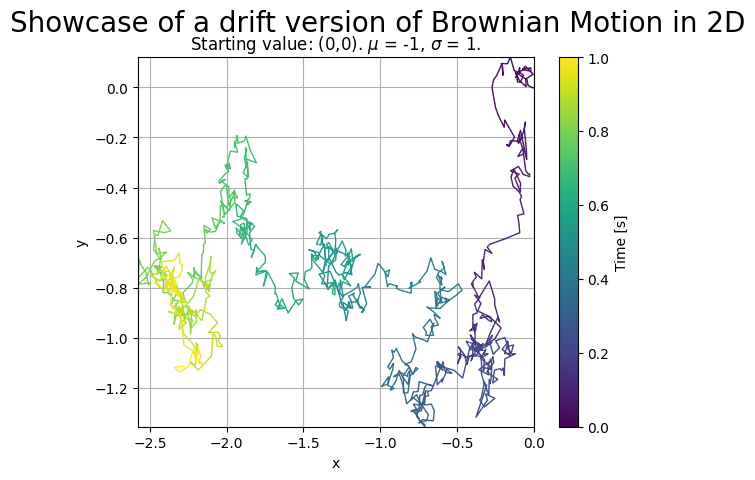

In [5]:
showcase1D(BrownianMotion.drift, "drift", mu=-1, sigma=1)
showcase2D(BrownianMotion.drift, "drift", mu=-1, sigma=1)

Natomiast dla ujemnych wartości $\mu$ zachowanie jest odwrotne - kolejne wartości mają tendencję spadkową. Ponownie, jest to odzwierciedlone na pierwszym wykresie. Na drugim wykresie obie współrzędne w ogólności maleją z czasem.

#### Wpływ parametru $\sigma$

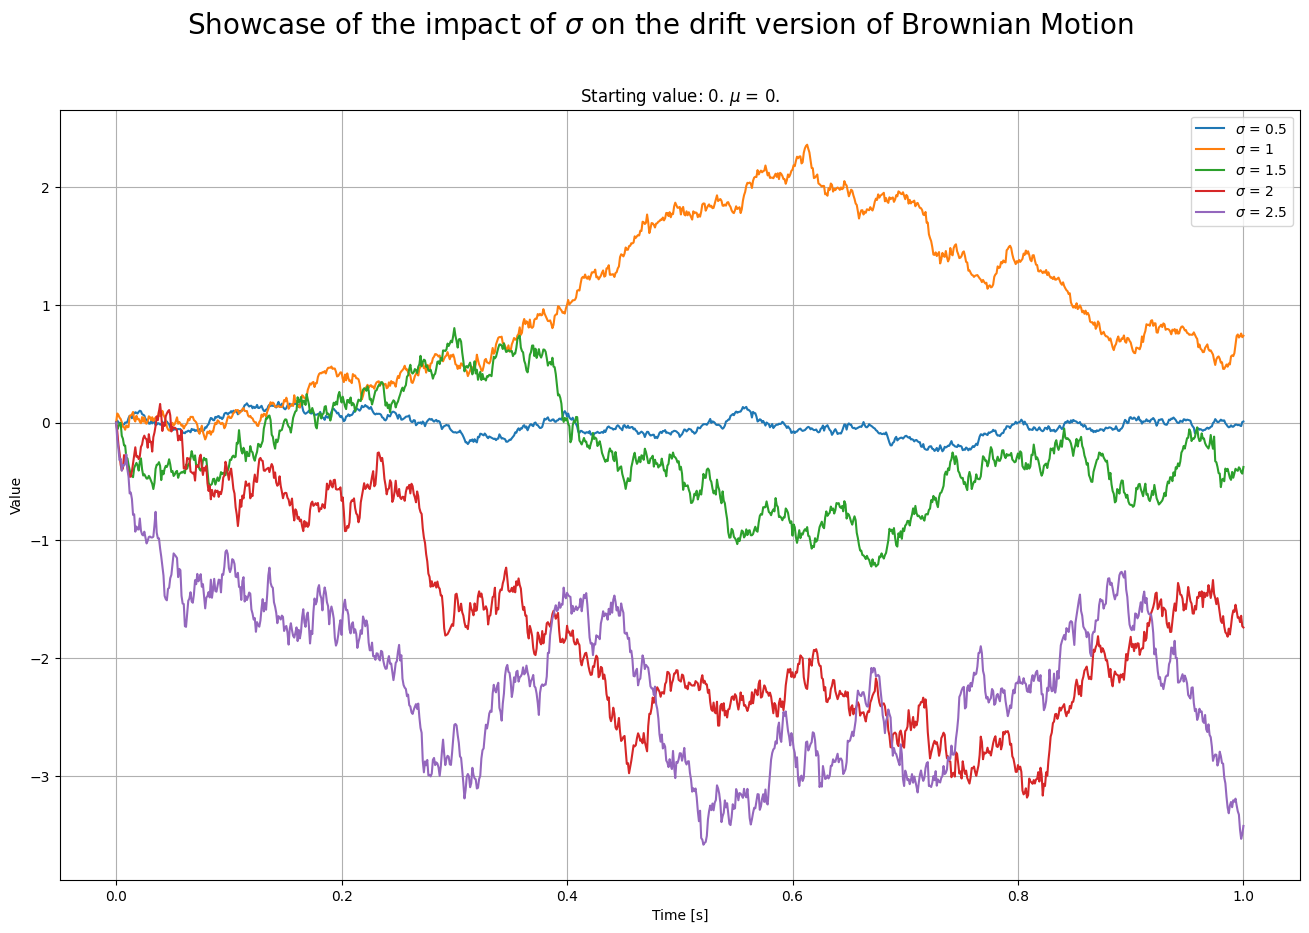

In [6]:
showcase_different_sigmas(BrownianMotion.drift,"drift",mu=0,sigmas=[0.5,1,1.5,2,2.5])

Parametr $\sigma$ wpływa na różnice między kolejnymi wartościami - im większą wartość przyjmuje, tym większe są wahania. Jest to odzwierciedlone na wykresie.

\* W przypadku tego parametru znak nie ma znaczenia - generujemy wartości zarówno dodatnie, jak i ujemne z tym samym prawdopodobieństem (rozkład Gaussa), więc po prostu odwracalibyśmy znak wygenerowanej wartości.

### Geometryczny ruch

Geometryczny ruch Browna to proces stochastyczny spłeniający stochastyczne równanie różniczkowe. Jego logarytm jest zgodny z ruchem Browna.

Równanie to w podstawowej postaci ma formę: $S_t = S_0 \exp((\mu - \frac{\sigma^2}{2})t + \sigma W_t)$,

gdzie:
- $S_0$ - arbitralnie wybrana wartość początkowa
- $W_t$ - standardowy ruch Browna

Po przekształceniu równania i podstawienia $x(t) = \ln{\frac{S_t}{S_0}}$ otrzymujemy wzór na zmianę położenia w czasie:

$\Delta x = (\mu - \frac{\sigma^2}{2}) \Delta t + \sigma \sqrt{t} \cdot N(0,1)$,

gdzie:
- $N(0,1)$ - liczba wygenerowana zgodnie z rozkładem Gaussa
- $\mu$ i $\sigma$ - parametry wpływające na wartość średnią i odchylenie standardowe przemieszczeń

W ogólności, geometryczny ruch Browna (tak naprawdę jego logarytm, nazywany też arytmetycznym) zachowuje się podobnie do ruchu z dryfem, różniąc się jedynie sposobem obliczania tego "dryfu". Podobnie, jak w poprzedniej wersji ruchu, tutaj również znak parametru $\sigma$ nie ma znaczenia - rozkład Gaussa jest symetryczny, a przy dryfie potęgujemy go, więc zawsze będzie dodatni.

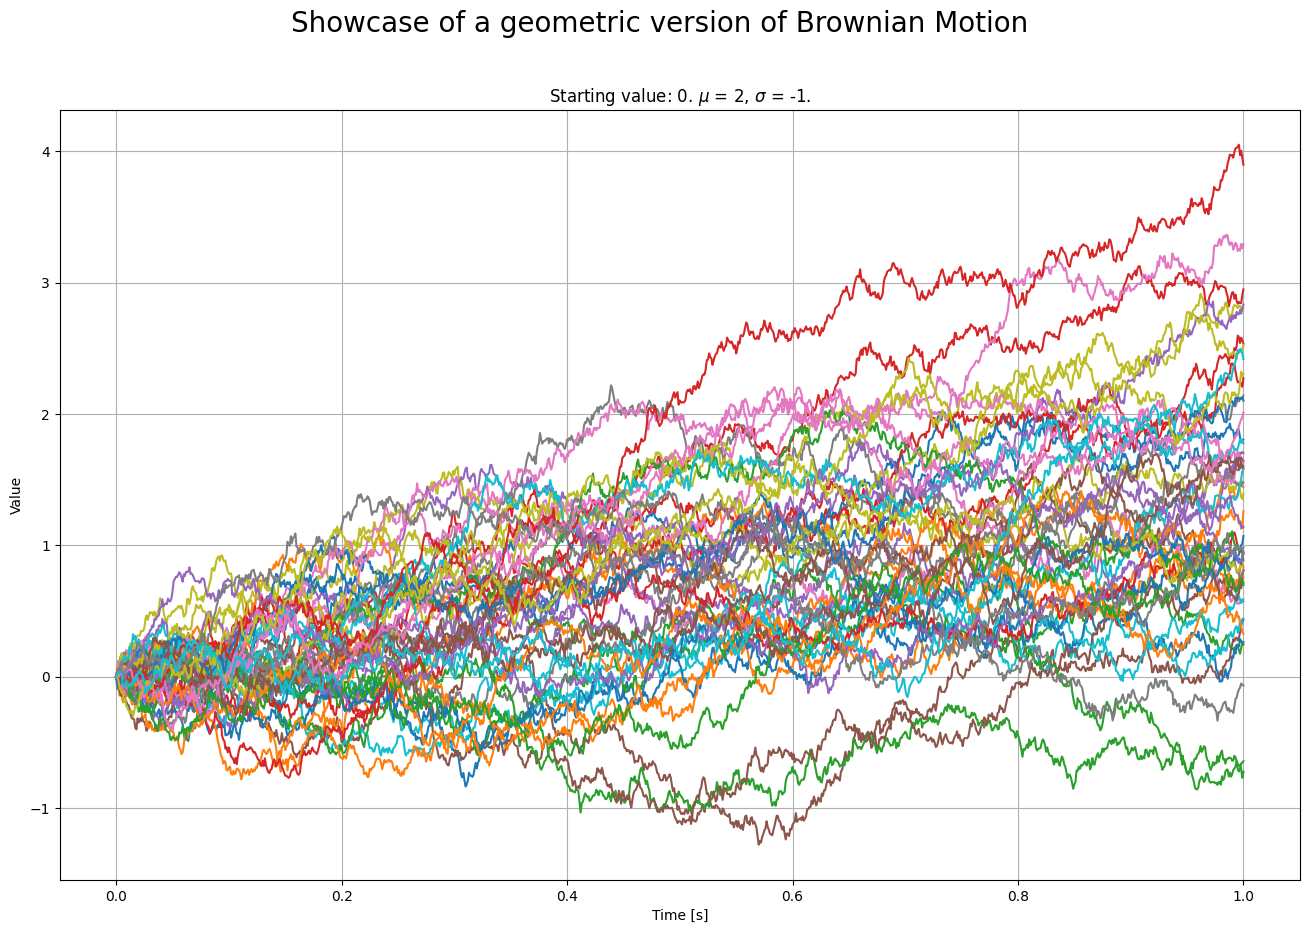

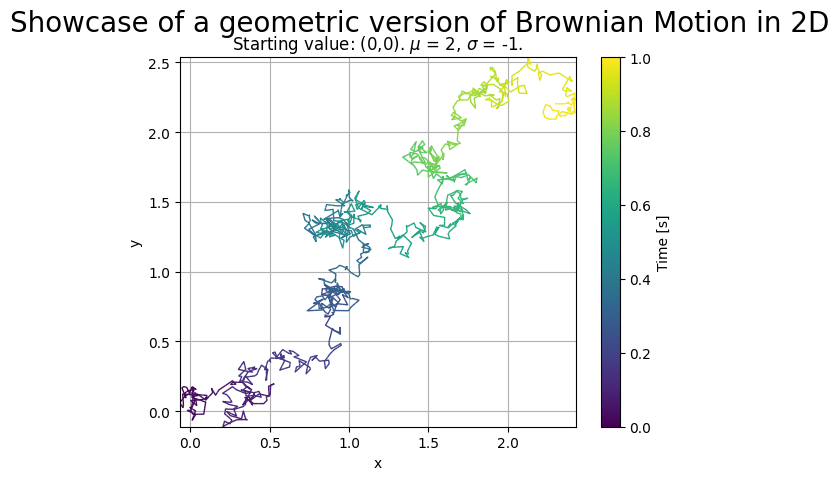

In [15]:
showcase1D(BrownianMotion.geometric, "geometric", mu=2, sigma=-1)
showcase2D(BrownianMotion.geometric, "geometric", mu=2, sigma=-1)

W powyższym przykładzie dryf jest dodatni ($2 - \frac{(-1)^2}{2} = 1 \frac{1}{2}$), a więc współrzędne mają w ogólności tendencję wzrostową, co widać wykresach.

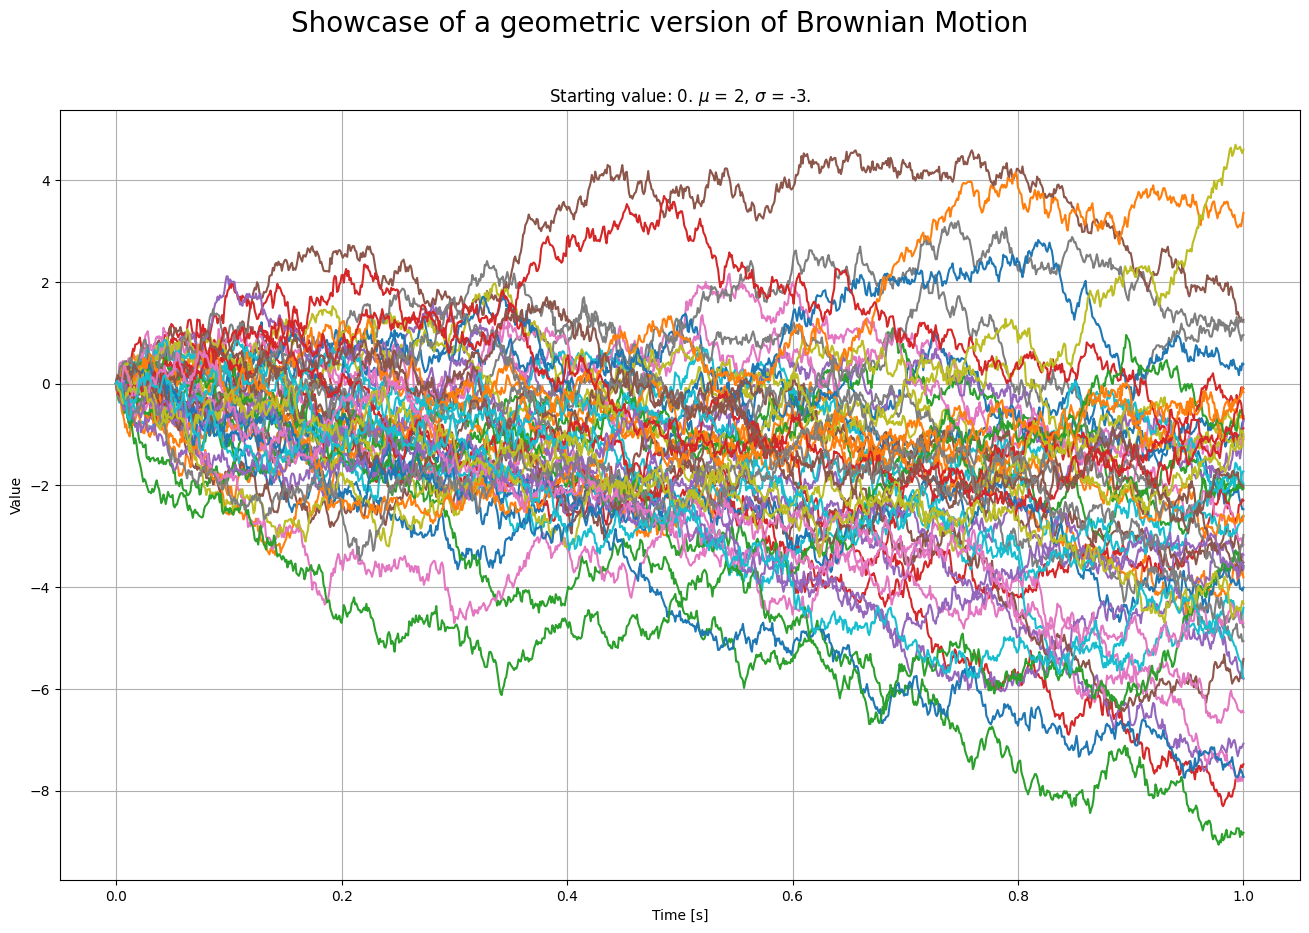

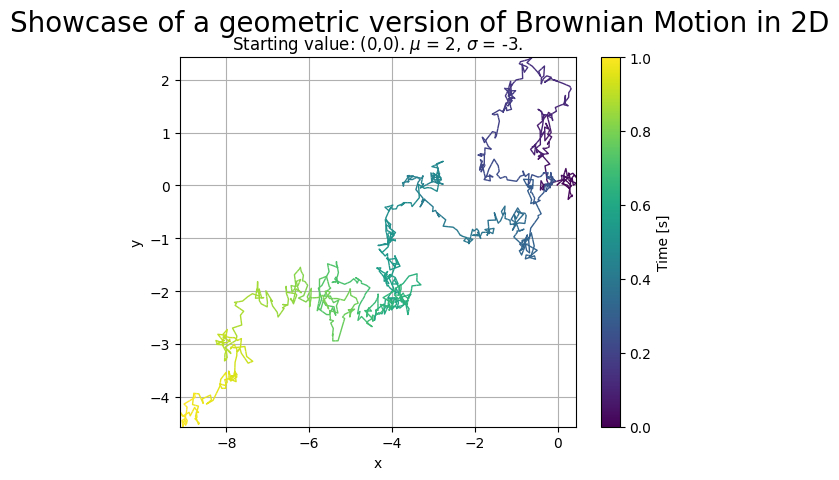

In [16]:
showcase1D(BrownianMotion.geometric, "geometric", mu=2, sigma=-3)
showcase2D(BrownianMotion.geometric, "geometric", mu=2, sigma=-3)

Uzyskanie ujemnego dryfu w ten sposób czyni ruch bardziej niestabilnym przez dodatkowe zwiększenie odchylenia standardowego. 

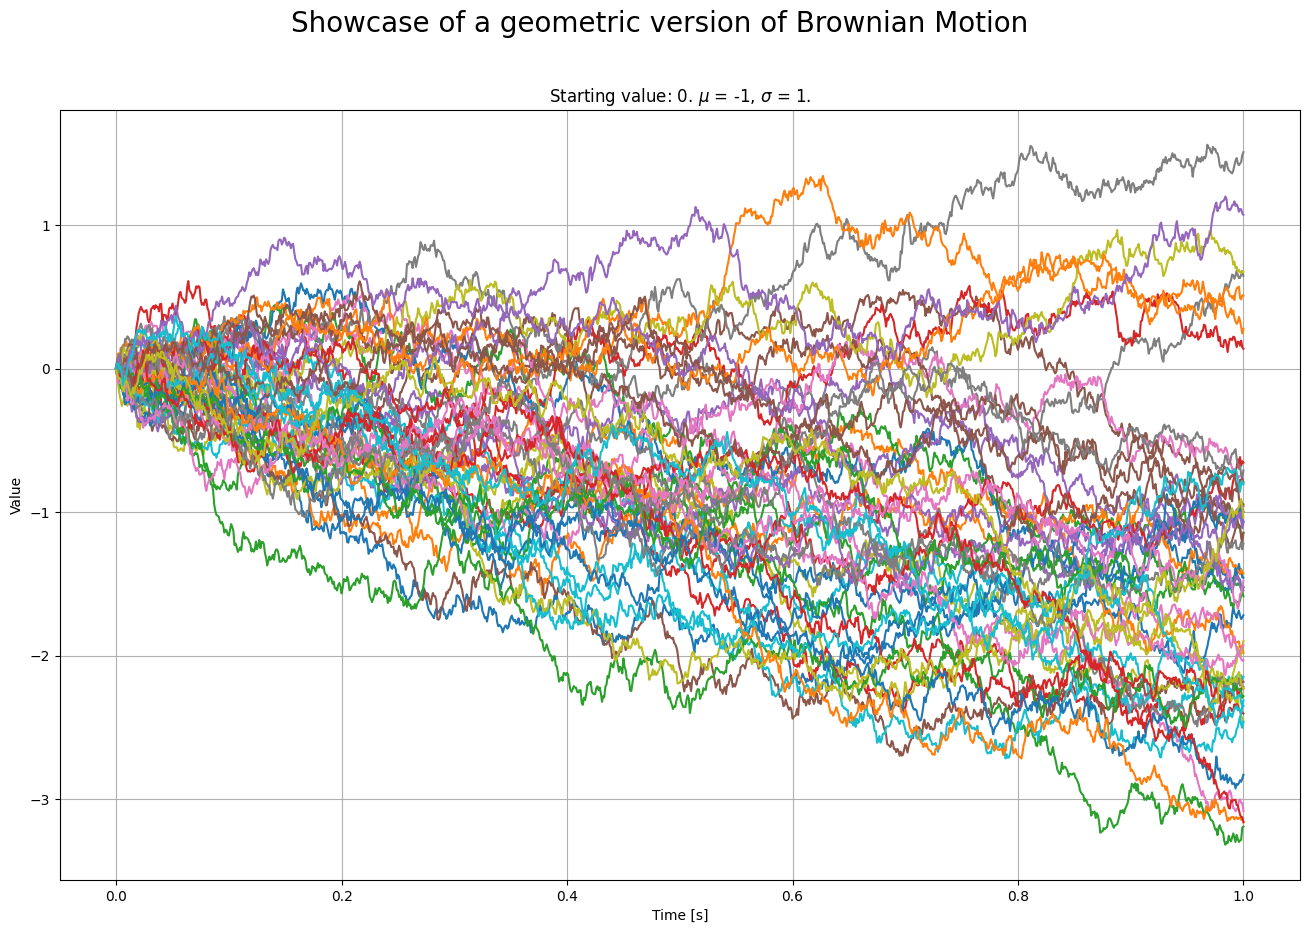

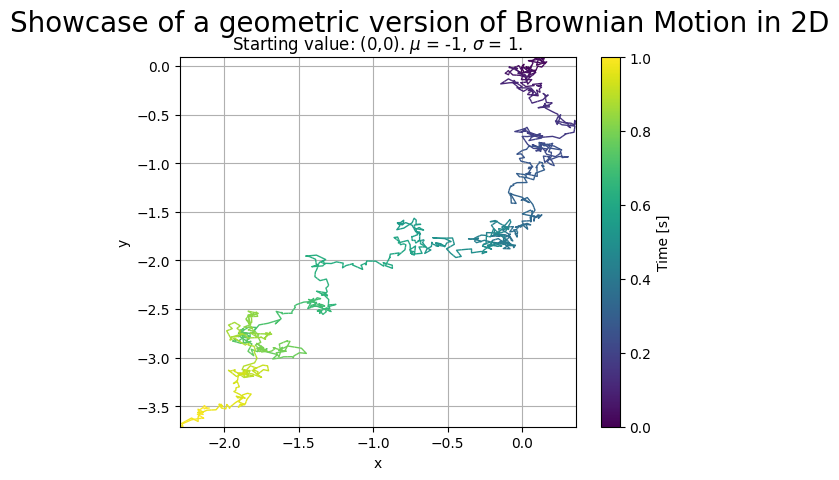

In [18]:
showcase1D(BrownianMotion.geometric, "geometric", mu=-1, sigma=1)
showcase2D(BrownianMotion.geometric, "geometric", mu=-1, sigma=1)

W powyższym przykładzie dryf jest ujemny ($-1 - \frac{1^2}{2} = -1 \frac{1}{2}$), a więc współrzędne mają w ogólności tendencję spadkową, co widać wykresach. Jest to stabilniejsza metoda, ponieważ nie zwiększamy odchylenia standardowego.

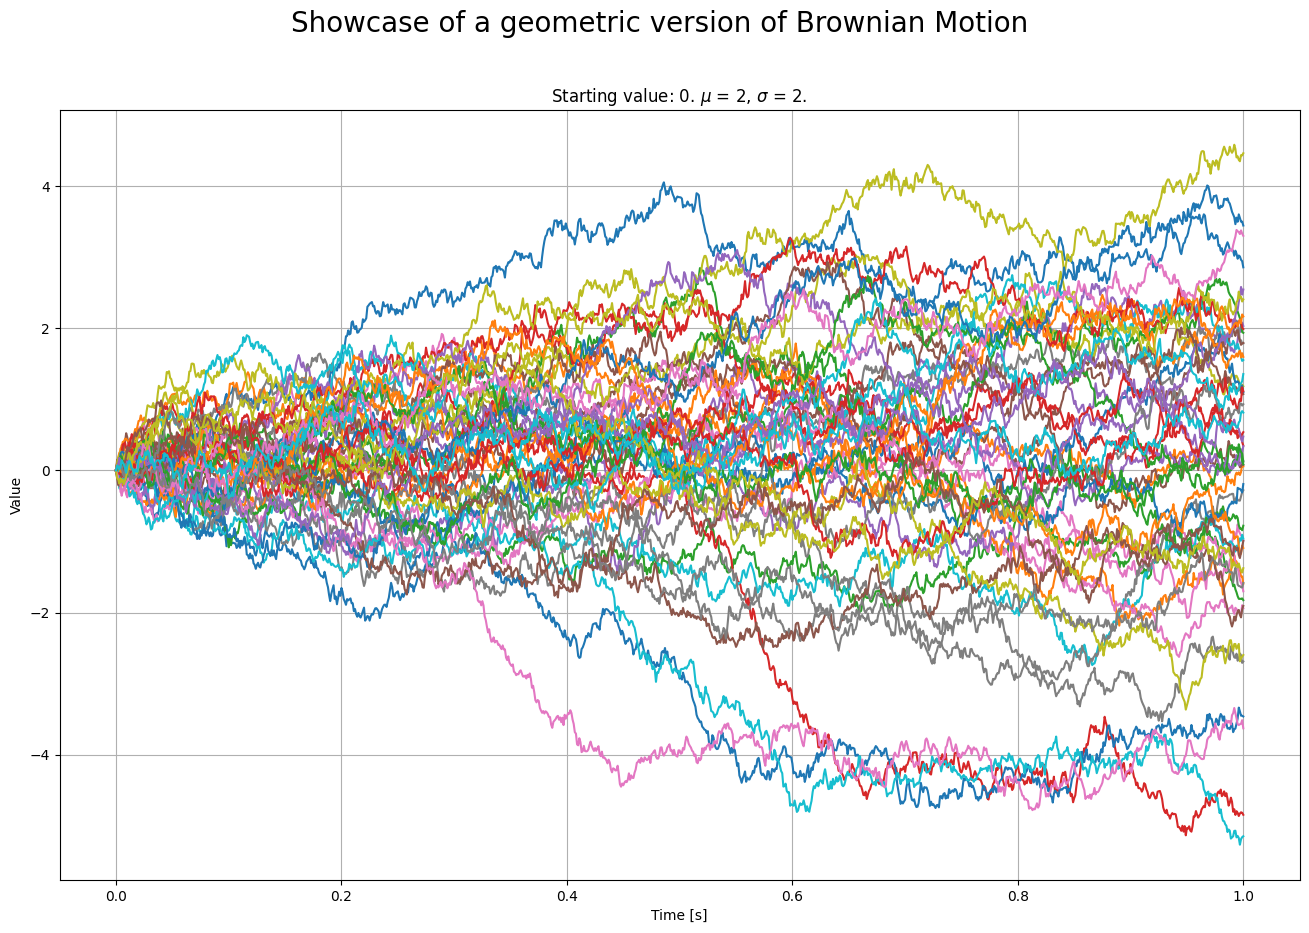

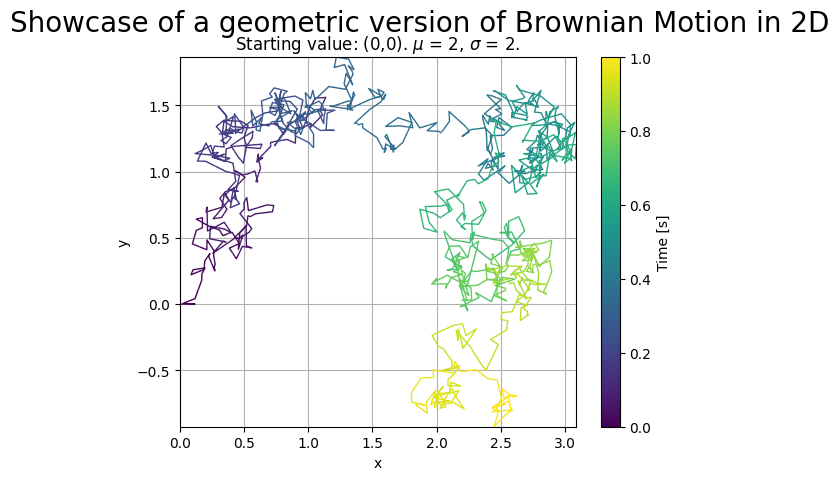

In [12]:
showcase1D(BrownianMotion.geometric, "geometric", mu=2, sigma=2)
showcase2D(BrownianMotion.geometric, "geometric", mu=2, sigma=2)

W powyższym przykładzie dryf jest zerowy, co czyni ruch praktycznie standardowym (różni się odchyleniem standardowym), jego zachowanie jest chaotyczne.

## Interaktywna aplikacja

Poniższa aplikacja zawiera scenariusze demonstrujące ruchy Browna.

In [ ]:
import main

main.main()

# Źródła:

- https://en.wikipedia.org
- https://medium.com